# 1-import the libraries 

In [57]:
#import pandas and numpy for data manpulation 
import pandas as pd 
import numpy as np 

#import matplot and seaborn for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

#import resample form sicikt learn for balance the data 
from sklearn.utils import resample

#import textblob for text analysis 
from textblob import TextBlob

#import tensorflow for deeplearning and text processing 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#regular expression (re) for search and manipulate patterns in strings 
import re

# natrual language toolkit for text processing and cleaning 
import nltk           
from nltk.corpus import stopwords

# importing more machine learning algorithms from scikit learn  
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [58]:
#download the natrual language processing toolkit for text cleaning
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziadg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziadg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ziadg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2-EDA

In [59]:
#loading and displaying first 10 rows of the data 
df = pd.read_csv("spam.csv") 
df.head(10) 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [60]:
#explore any text-message for cleaning and analysis 
df.iloc[0]['Message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

after exploring different messages we need to: 

-remove the stop word(the , are , is ,...) 

-convert all text to lowercase 

-remove punctuation 

-lemmatization (return all words to their base form or (lemma)) 


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.shape

(5572, 2)

the dataset contains: 

5572 rows and 2 columns 

the data is only object(str) 

no missing values  


In [63]:
#count the number of each label 
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

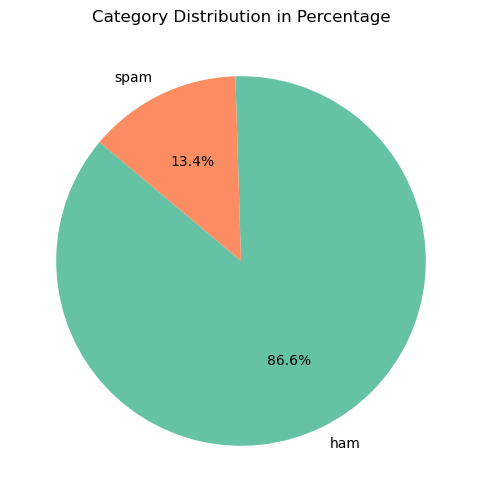

In [64]:
# Calculate the percentage of each category
category_counts = df['Category'].value_counts(normalize=True) 
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Category Distribution in Percentage')
plt.show()

the labels needs to be balanced (prefer oversampling spam messages because we need all other ham)  

In [65]:
#assign ham = 1 and spam = 0 
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0) 

In [66]:
# Oversampling the minority class to balance the target 
spam = df[df['Category'] == 1]
ham = df[df['Category'] == 0]
spam_oversampled = resample(spam, replace=True, n_samples=len(ham), random_state=0)
df = pd.concat([ham, spam_oversampled])

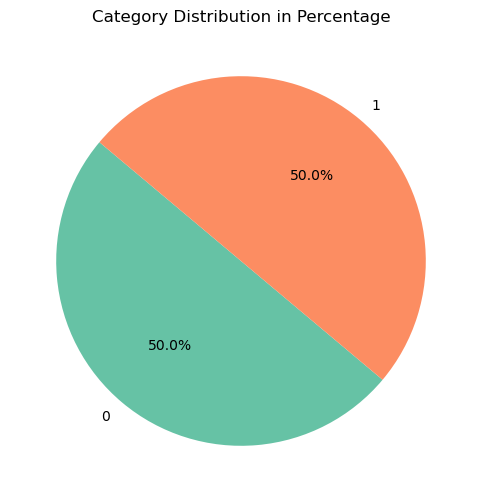

In [67]:
#now check the balanced data 
category_counts = df['Category'].value_counts(normalize=True) 
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Category Distribution in Percentage')
plt.show()

# 3-analysis and text-preprocessing 

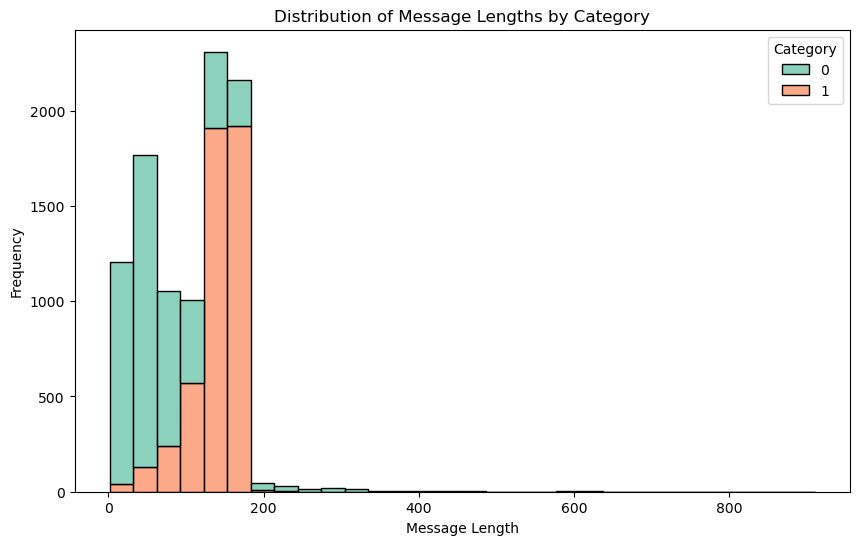

In [68]:
# Plot the distribution of message lengths by category
df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Message_Length', hue='Category', multiple='stack', bins=30, palette='Set2')
plt.title('Distribution of Message Lengths by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

-ham messages are generally shorter than spam messages.

-spam messages have more in the 100-200 character range.

-Messages up to 100 characters show significant overlap between spam and ham.

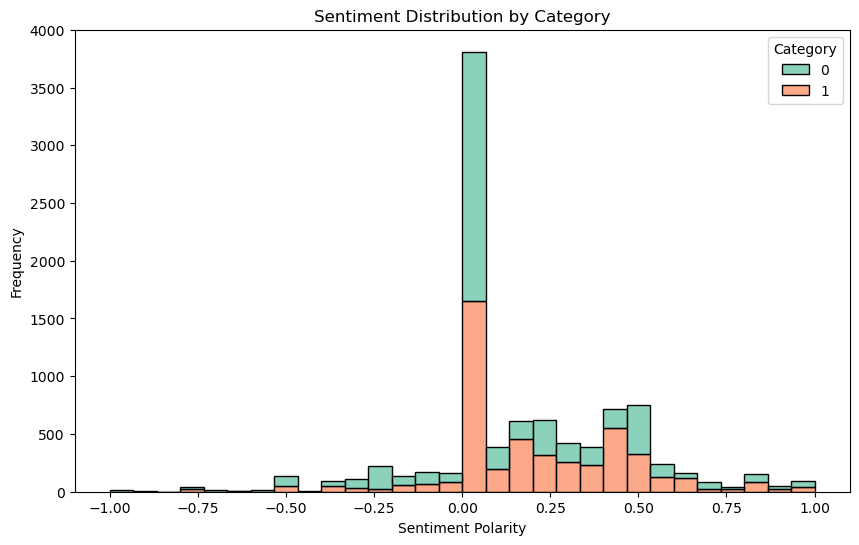

In [69]:
# Sentiment analysis on balanced samples of the 2 classes 
df['Sentiment'] = df['Message'].apply(lambda text: TextBlob(text).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentiment', hue='Category', multiple='stack', bins=30, palette='Set2')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

ham messages mostly have neutral sentiment polarity.

spam messages show a more varied sentiment, including more positive polarity.

### 3.1-text cleaning 

In [70]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatization
    return ' '.join(text)

df['Message'] = df['Message'].apply(preprocess_text)

In [71]:
df.iloc[200]


Category                                      0
Message           printed oh ltgt come upstairs
Message_Length                               50
Sentiment                                   0.0
Name: 236, dtype: object

In [72]:
df.iloc[100]

Category                                                          0
Message           hmmmy uncle informed he paying school directly...
Message_Length                                                   86
Sentiment                                                       0.1
Name: 119, dtype: object

now the text is clean and you can see the sentiment and message length on each message 

 ### 3.2-data prepration and preprocessing 

In [73]:
# Define the number of features (words) to consider
max_features = 800

# Initialize the tokenizer with the specified number of features and word splitting by space
tokenizer = Tokenizer(num_words=max_features, split=' ')

# Fit the tokenizer on the text data 
tokenizer.fit_on_texts(df['Message'].values)

# Convert the text data into sequences of integers to make it as input 
X = tokenizer.texts_to_sequences(df['Message'].values)

# Pad_sequences to ensure uniform input size for the model
X = pad_sequences(X)

# Extract the labels 
Y = df['Category'].values

In [74]:
#train-test split 70% on tainning - 30% on test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## 4-model building and trainnig 

In [80]:
# Define the model architecture
model = tf.keras.Sequential([
    # Embedding layer to convert integer sequences to dense vectors
    tf.keras.layers.Embedding(max_features, 128, input_length=X.shape[1]),
    
    # Dropout layer to prevent overfitting setting 40% of input units to 0
    tf.keras.layers.SpatialDropout1D(0.40),
    
    # LSTM layer with 50 units
    tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2),
    
    # Dense layer with a single unit and sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model on the training data for 20 epochs with a batch size of 64
trainned_model = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 45, 128)           102400    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 45, 128)           0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 50)                35800     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 138251 (540.04 KB)
Trainable params: 138251 (540.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
212/212 [==============================] - 11s 34ms/step - loss: 0.22

# 5-model evaluation  

91/91 [==============================] - 1s 7ms/step - loss: 0.0300 - accuracy: 0.9952
Loss: 0.03000231273472309, Accuracy: 0.9951640963554382


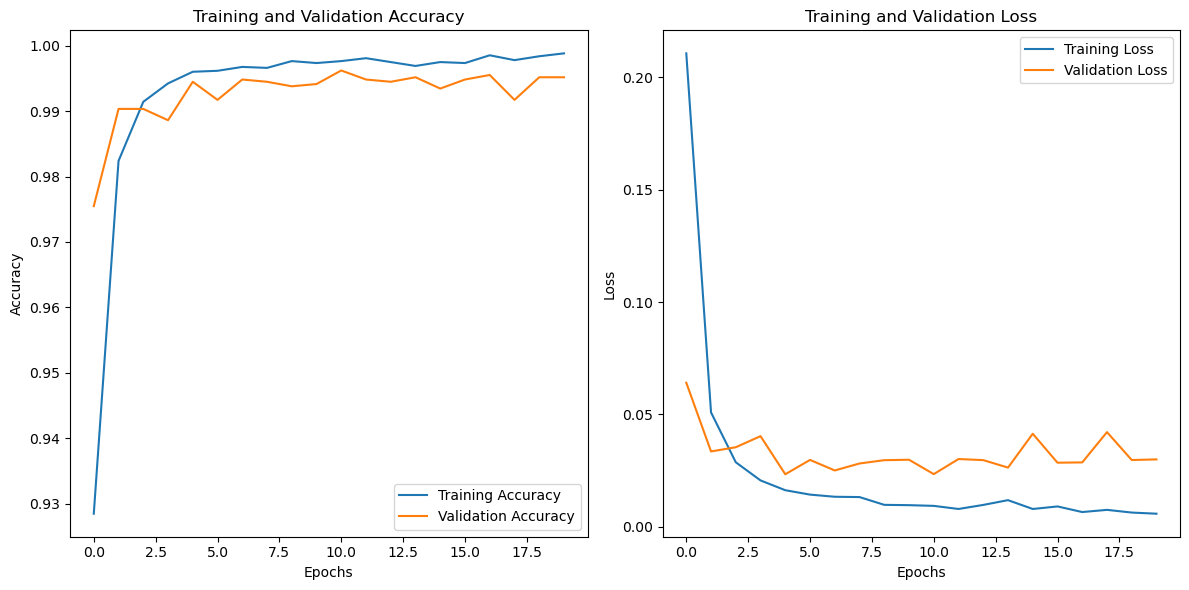

In [76]:
# evaluating the model  
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# comparing the train and evaluate via (accuracy and loss)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(trainned_model.history['accuracy'], label='Training Accuracy')
plt.plot(trainned_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trainned_model.history['loss'], label='Training Loss')
plt.plot(trainned_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The model has achieved a high accuracy of 99.51% with a low loss of 0.0401 after training. The training and validation curves show a good fit, indicating that the model is learning well and generalizing to new data.

In [77]:
# Make predictions on test data
Y_pred_prob = model.predict(X_test)
Y_pred = np.where(Y_pred_prob > 0.5, 1, 0)

# Ensure Y_test is in the correct format (binary labels)
Y_test = np.array(Y_test)

# Generate classification report
report = classification_report(Y_test, Y_pred, target_names=['ham', 'spam'])

print("Classification Report:")
print(report)

91/91 [==============================] - 2s 8ms/step
Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      1434
        spam       0.99      1.00      1.00      1461

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895



good percision and recall for both ham and spam and there is no signs of overfitting 

### 6- Try different ml classifiers to compare 

In [81]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_clf.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf, target_names=['ham', 'spam']))


Random Forest Classifier:
Accuracy: 0.9775474956822107
              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1434
        spam       0.96      1.00      0.98      1461

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895



In [82]:
# Initialize the Naive Bayes Classifier
nb_clf = MultinomialNB()

# Train the model
nb_clf.fit(X_train, Y_train)

# Make predictions
Y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb, target_names=['ham', 'spam']))


Naive Bayes Classifier:
Accuracy: 0.7937823834196891
              precision    recall  f1-score   support

         ham       0.74      0.89      0.81      1434
        spam       0.86      0.70      0.77      1461

    accuracy                           0.79      2895
   macro avg       0.80      0.79      0.79      2895
weighted avg       0.81      0.79      0.79      2895



- Accuracy is highest in the LSTM classifier.

- recision, Recall, and F1-Score are significantly better in the LSTM classifier compared to Naive Bayes and slightly better than Random Forest.

- Naive Bayes struggles with spam detection compared to Random Forest and LSTM.

- Random Forest performs very well but is slightly outperformed by the LSTM classifier in all metrics.